## Dimensionality (reduction) of political landscapes
Fynn Bachmann, University of Hamburg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from openTSNE import TSNE
from sklearn.decomposition import PCA
from utils import wrap_labels

In [2]:
dataset = pd.read_csv('data/SoGoSurvey_Dimensionality Reduction_1.csv', usecols=range(3,9), skiprows=[1])
dataset

,1.How familiar are you with mathematical programming?,2.How many dimensionality reduction algorithms do you know?,3.Do what degree have you been involved in designing a scientific survey?,4.Where do you consider yourself politically from left to right?,5.What is your favorite number (among these)?,6.How do you feel about our upcoming analysis?
1,6,7,1,2,7,9
2,1,0,9,5,0,9
3,5,0,0,4,7,5
4,4,3,1,2,8,9
5,4,0,7,4,6,9
6,6,2,9,0,5,9
7,2,2,7,4,8,8
8,9,4,0,3,1,8
9,8,2,4,3,8,9
10,9,3,3,0,7,8


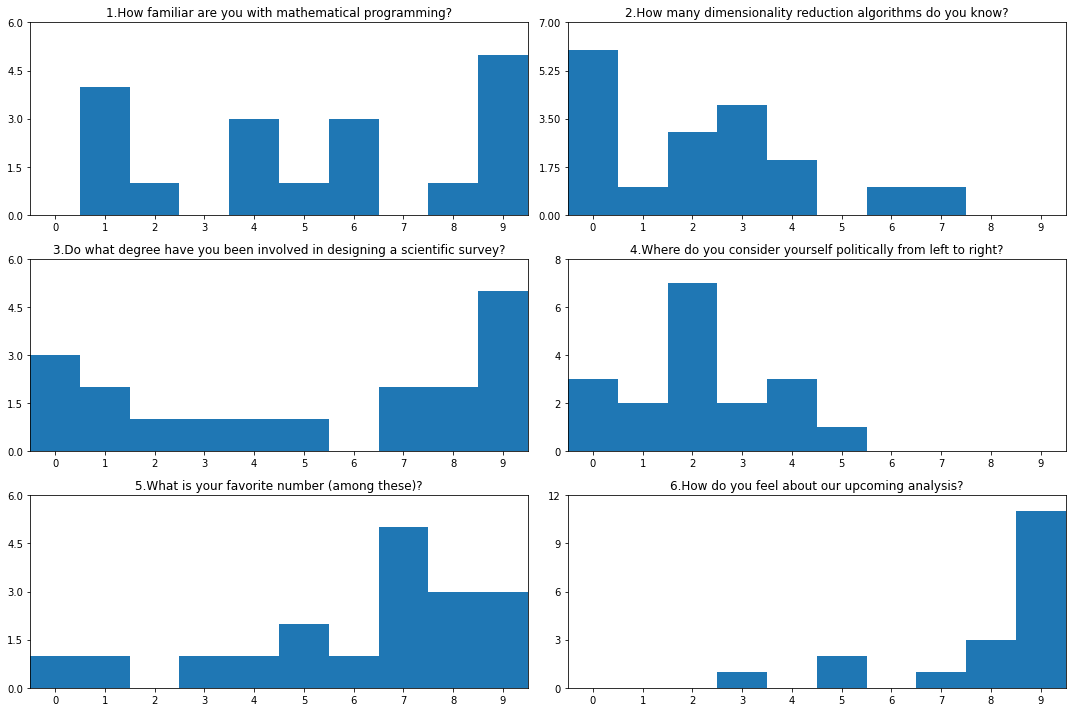

In [3]:
fig, axes = plt.subplots(3,2, figsize=(15,10))

for ax, name in zip(axes.flatten(),dataset):
    val, _, _ = ax.hist(dataset[name], bins=np.arange(11)-.5, width=1)
    ax.set(title = name,
           xlim  = (-.5,9.5),
           ylim  = (0, val.max()),
           yticks = np.linspace(0,val.max()+1, 5),
           xticks = np.linspace(0,9, 10))

plt.tight_layout()

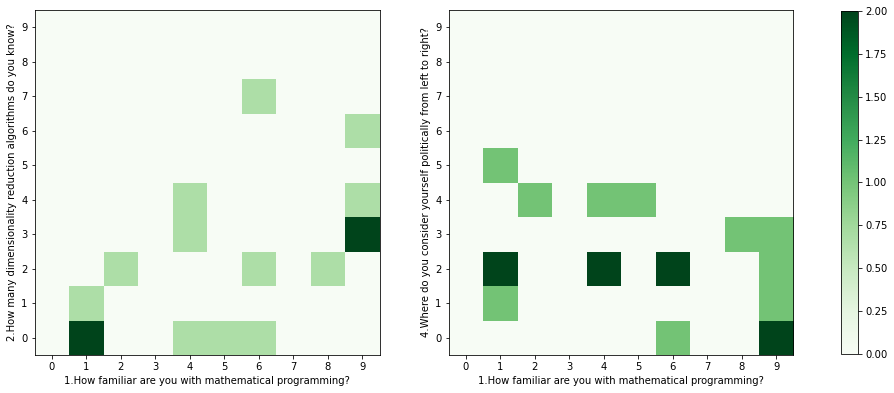

In [4]:
L = 1,2
R = 1,4

#L = 1,3
#R = 2,3

#L = 2,4
#R = 3,4

fig, axes = plt.subplots(1,2,figsize=(17,9))

for (A,B), ax in zip((L, R), axes):
    H, _, _ = np.histogram2d(dataset.iloc[:,A-1], dataset.iloc[:,B-1], bins=np.arange(11)-.5)

    im = ax.imshow(H.T, cmap='Greens', origin='lower')

    ax.set(xlim  = (-.5,9.5),
           ylim  = (-.5,9.5),
           xticks = np.linspace(0,9, 10),
           yticks = np.linspace(0,9, 10),
           xlabel = dataset.columns[A-1],
           ylabel = dataset.columns[B-1])

cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.7)
plt.show()

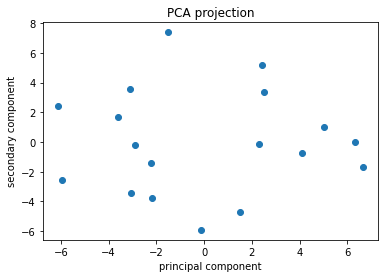

In [5]:
pca = PCA(n_components=2)
embedding = pca.fit_transform(dataset)
X,Y = embedding.T
plt.scatter(X,Y)
plt.title('PCA projection')
plt.xlabel('principal component')
plt.ylabel('secondary component')
plt.show()

Explained variance ratio: [0.39806422 0.30791152]
Principal component: [ 0.59222757  0.32111444 -0.72905318 -0.07672656 -0.04085385  0.08412778]
Secondary component: [-0.51759518 -0.21586195 -0.59091143  0.11693648  0.47063827 -0.31803775]


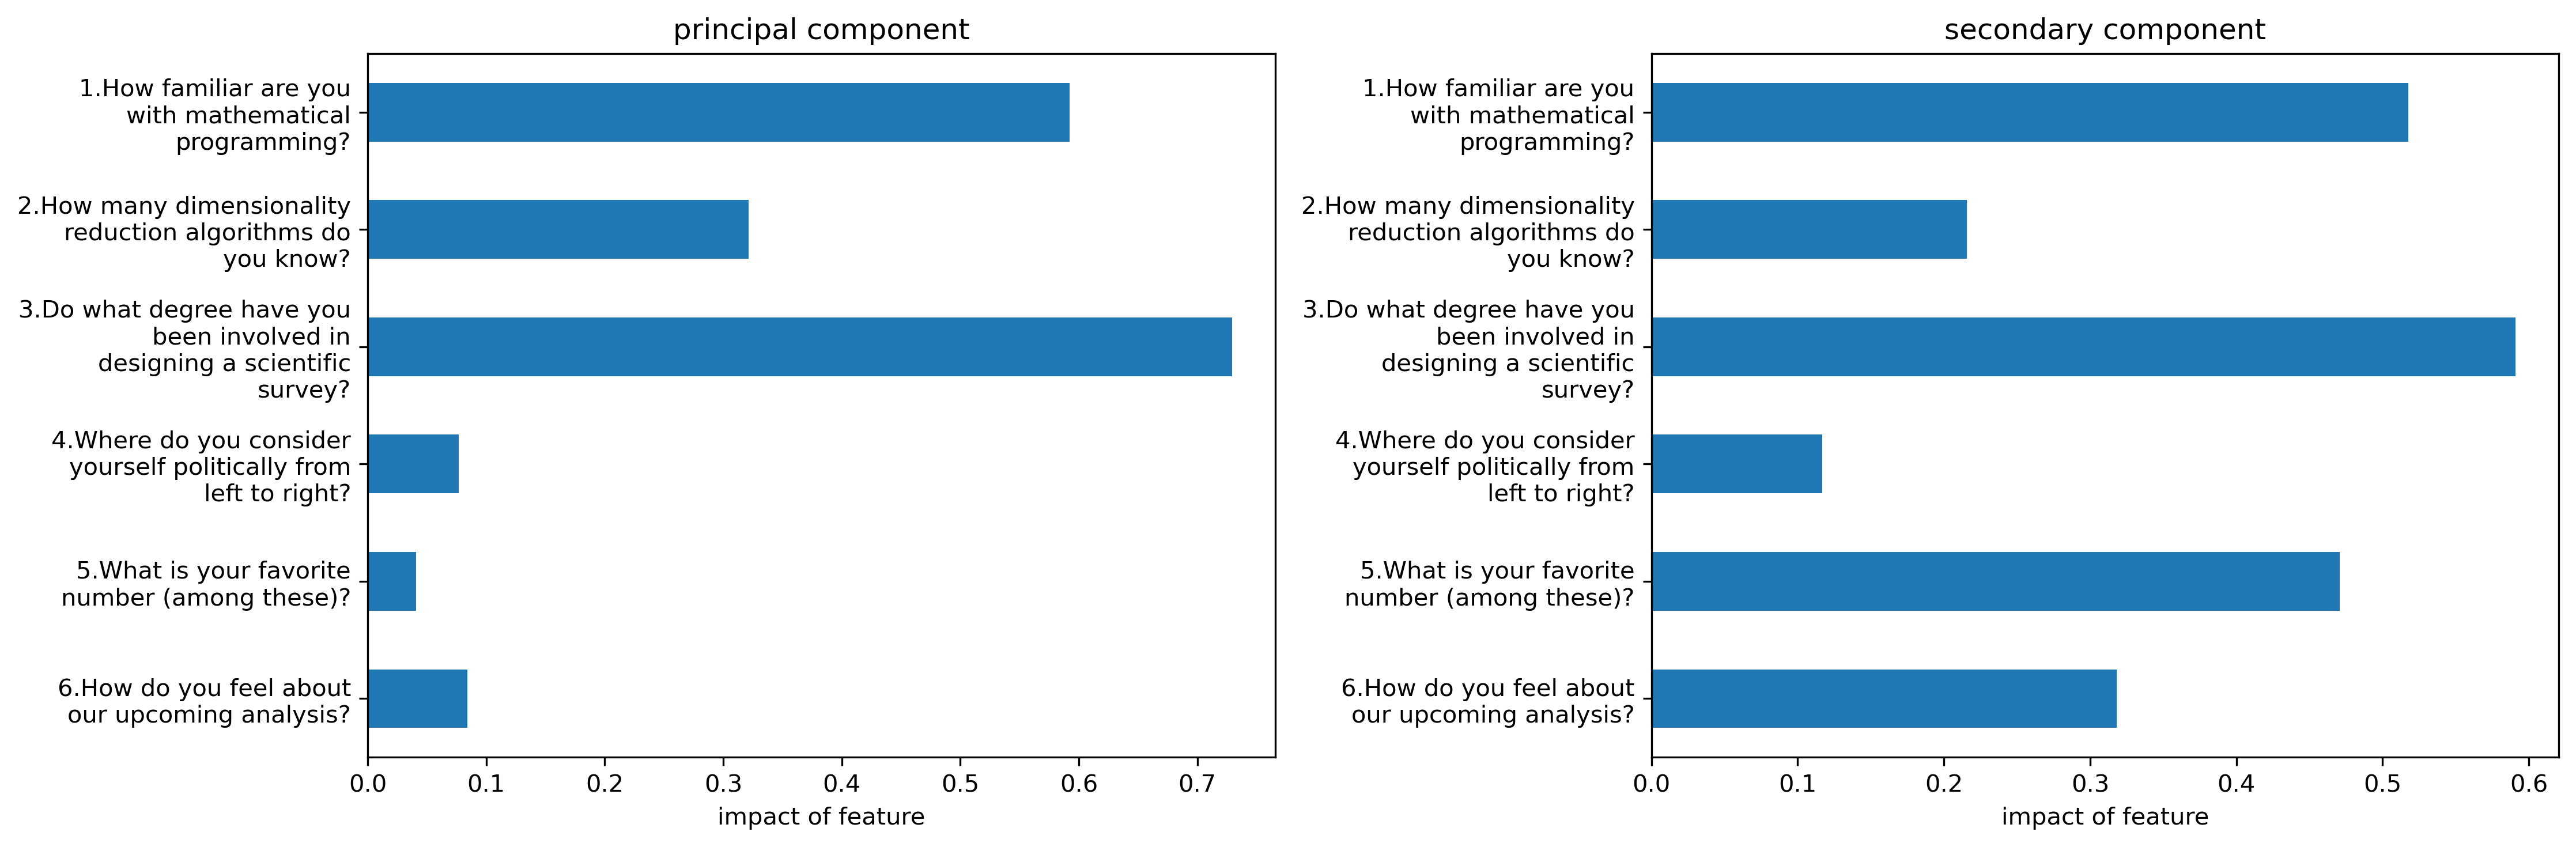

In [6]:
A,B = pca.components_
print("Explained variance ratio:",pca.explained_variance_ratio_)
print("Principal component:",A)
print("Secondary component:",B)

fig, axes = plt.subplots(1,2, figsize=(15,5), dpi=300)

for ax, name, vector in zip(axes, ('principal', 'secondary'), pca.components_):
    pd.Series(np.abs(vector), index=dataset.columns).plot.barh(ax=ax)
    ax.set(title=f'{name} component', xlabel='impact of feature')
    wrap_labels(ax, 25)
    ax.invert_yaxis()
    
plt.tight_layout()

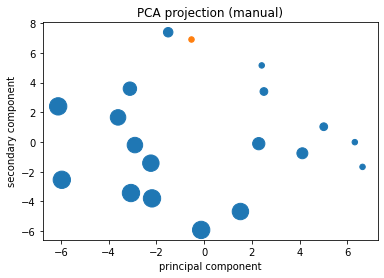

In [7]:
### new datapoint
newpoint = np.array([0,0,0,5,5,5])

### highlight feature
F = 3

### project dataset
X,Y = (pca.components_@(dataset - pca.mean_).T).values
a,b = pca.components_@(newpoint - pca.mean_).T

### visualize
plt.scatter(X,Y,s=(dataset.iloc[:,F-1].values+1)*30)
plt.scatter(a,b,s=(newpoint[F-1]+1)*30)
plt.title('PCA projection (manual)')
plt.xlabel('principal component')
plt.ylabel('secondary component')
plt.show()

Perplexity value 30 is too high. Using perplexity 5.67 instead


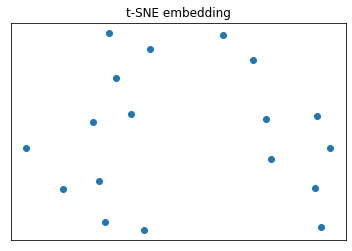

In [8]:
tsne = TSNE(random_state=2, initialization='random')
embedding = tsne.fit(dataset)
X,Y = embedding.T
plt.scatter(X,Y)
plt.xticks([])
plt.yticks([])
plt.title('t-SNE embedding')
plt.show()

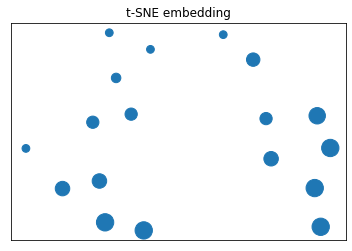

In [9]:
### new datapoint
newpoint = np.array([0,0,0,5,5,5])

### highlight feature
F = 1

### embed dataset
plt.scatter(X,Y,s=(dataset.iloc[:,F-1].values+1)*30)
plt.xticks([])
plt.yticks([])
plt.title('t-SNE embedding')
plt.show()

### Part2
Just to play around with the dataset, we delete the noisy Question 5 about favourite numbers...

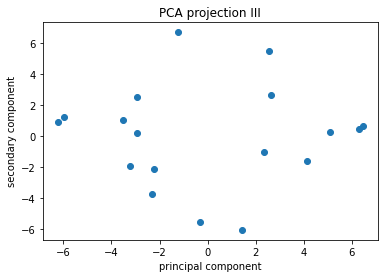

In [10]:
pca2 = PCA(n_components=2)
embedding = pca2.fit_transform(dataset.drop(dataset.columns[4], axis=1))
X,Y = embedding.T
plt.scatter(X,Y)
plt.title('PCA projection III')
plt.xlabel('principal component')
plt.ylabel('secondary component')
plt.show()

In [11]:
pca2.explained_variance_ratio_

array([0.48244553, 0.33099542])